**HOUSE PRICE PREDICTION USING LINEAR REGRESSION**

Linear Regression:It is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features.

In [1]:
#loading need libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv("/USA_Housing.csv")


#from google.colab import drive
#drive.mount('/content/drive'

In [3]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#shape of train data
df.shape

(5000, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## **ANALYZE THE DISTRIBUTION OF PRICES IN THE DATASET**

<ipython-input-33-334e102e3b79>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], fit=stats.norm)


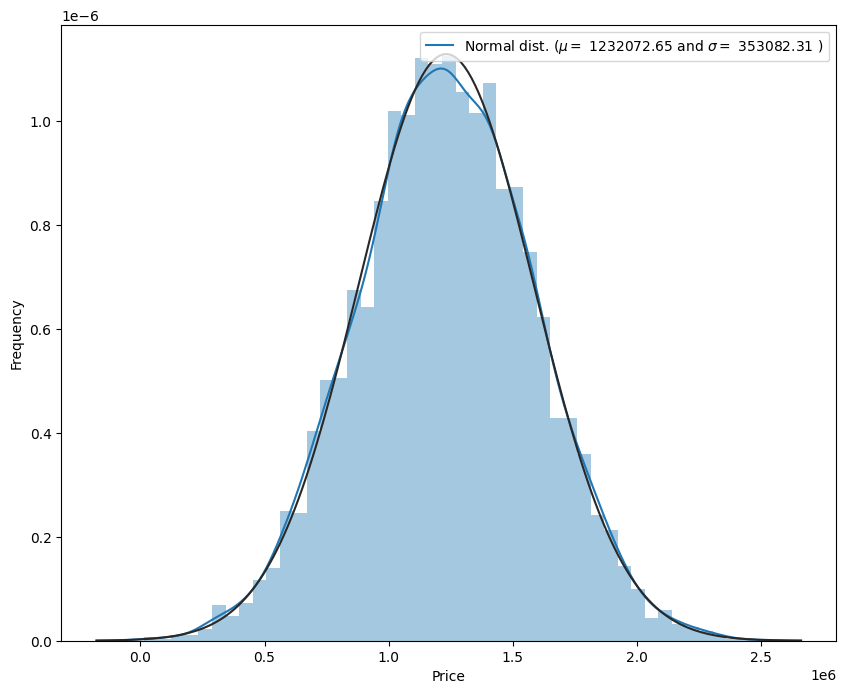

In [33]:
plt.subplots(figsize=(10,8))
sns.distplot(df['Price'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(df['Price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

plt.show()

## **HEATMAP OF FEATURE CORRELATION ANALYSIS**

In [26]:
# Finding out the correlation between the features
corr = df.corr()


<ipython-input-26-a370b9f65bda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

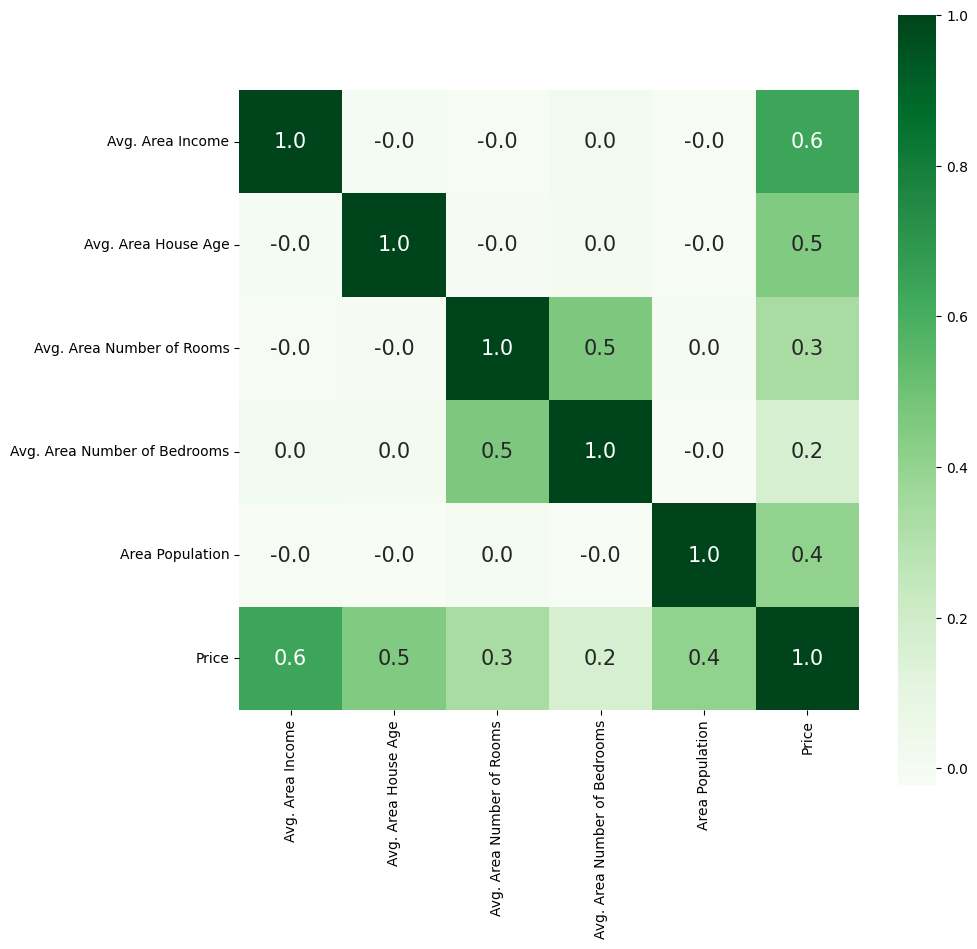

In [30]:
# Plotting the heatmap of correlation between features
corr.shape
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')


Thus, it is depicting that Avg. Area Income and Price have strong Positive correlation. This means that as one feature increases, the other tends to increase as well.

In [7]:
# Check for missing values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

##**FEATURE SELECTION**
 x --> Independent Variables / Features

 y --> Dependent Variable / Target Variable

In [8]:
x=df[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population']]
y=df['Price']

## **SPLITTING THE DATASET INTO TRAINING & TESTING DATA**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

## **LINEAR REGRESSION MODEL TRAINING**

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model=LinearRegression()
#model is created at this particular time

In [13]:
model.fit(x_train,y_train)

LinearRegression()

## **LINEAR REGRESSION MODEL COEFFICIENTS**
Linear regression equation:

>***y = β0 + β1x1 + β2x2 + ...***


*   **y** is the predicted value of the dependent variable (y: price) for any given value of the independent variable (x).
*  **β0** is the intercept, the predicted value of y when the x is 0.
* **β1, β2, etc** These are the model  coefficients associated with each independent variable. How much we expect y to change as x increases.
* **x** is the independent variable



In [14]:
print(model.intercept_)
#value of beta 0

-2632608.25349218


In [15]:
print(model.coef_)
#values of beta 1,2,3...

[2.17365870e+01 1.65300752e+05 1.19207327e+05 1.62951802e+03
 1.51147604e+01]


In [16]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


## **MODEL PREDICTION AND EVALUATION**

Assessing model's performance on test set or unseen data. It calculates different error metrics (MAE, MSE, and RMSE) to evaluate the accuracy and precision of the model's predictions.


In [17]:
prediction=model.predict(x_test)

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#root_mean_sq is imported through python np

In [19]:
print(mean_absolute_error(prediction,y_test))

80416.63059774718


In [20]:
mse=mean_squared_error(y_test,prediction)
print(mse)


10078142086.326303


In [21]:
import numpy as np
np.sqrt(mse)

100389.95012612718

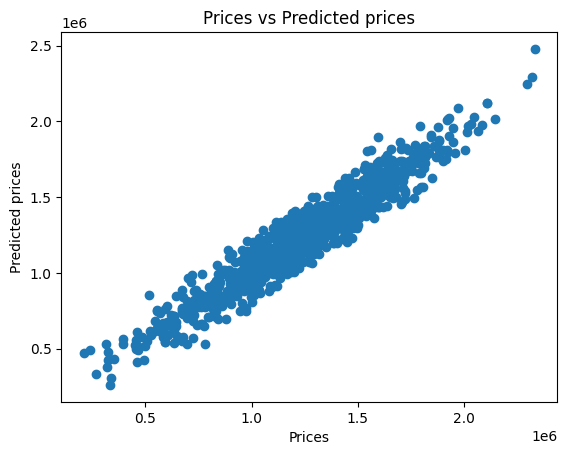

In [22]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, prediction)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()